# Simple Linear Regression 
### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Author :      Niharika Gupta 
### Organization : The Spark Foundation  
###  Internship : Data Science & Bussiness Analytics  
### Task 1 : Exploring Supervised Machine Learning  
### Task Level : Beginner  
### Task to perform : Predict Student scores based on their study hours 

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

import warnings 
warnings.filterwarnings('ignore')

## Understanding the dataset


In [2]:
data = pd.read_csv('http://bit.ly/w-data')              #import the data from link

In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.describe()                 #describtion of data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.info()             

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.shape

(25, 2)

## Visualization

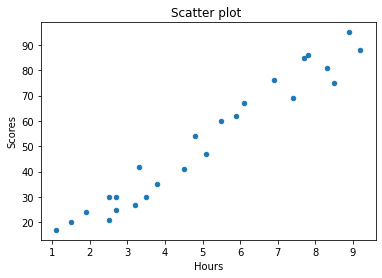

In [7]:
data.plot(kind= 'scatter', x= 'Hours', y= 'Scores', title = 'Scatter plot ')
plt.show()

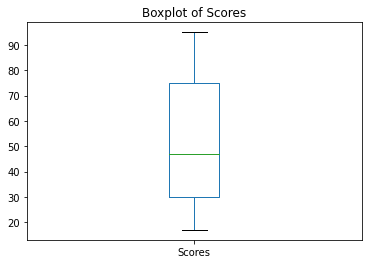

In [8]:
data.Scores.plot(kind= 'box', title = 'Boxplot of Scores')

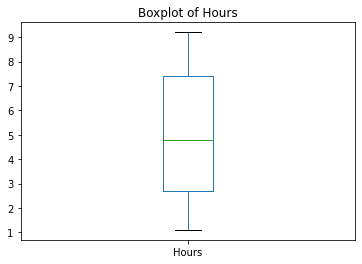

In [9]:
data.Hours.plot(kind= 'box', title = 'Boxplot of Hours')

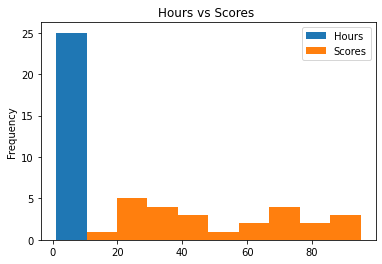

In [10]:
data.plot(kind= 'hist',title = 'Hours vs Scores ')

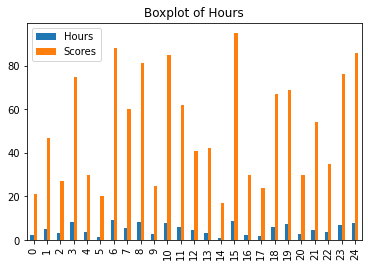

In [11]:
data.plot(kind= 'bar', title = 'Boxplot of Hours')

In [13]:
x= data['Hours']
y= data['Scores']

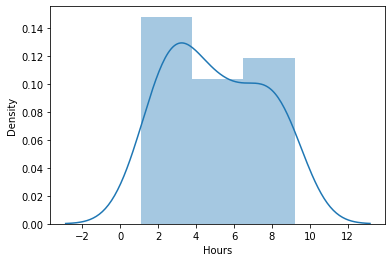

In [14]:
sns.distplot(x)

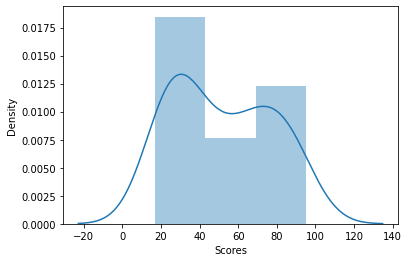

In [15]:
sns.distplot(y)

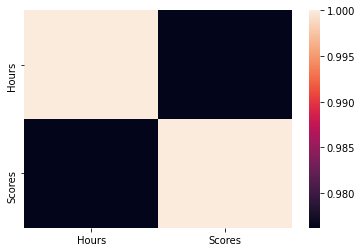

In [12]:
sns.heatmap(data.corr())                  #correlation matrix

# Linear Regression Model

## Training the model


In [16]:
x = data.iloc[: ,:-1].values
y = data.iloc[:,1].values
x_train, x_test, y_train, y_test= train_test_split(x, y,train_size=0.80,test_size=0.20,random_state=0)

In [17]:
linearRegressor= LinearRegression()
linearRegressor.fit(x_train, y_train)
y_predict= linearRegressor.predict(x_test)

print("Training complete.")

Training complete.


In [18]:
line = linearRegressor.coef_*x + linearRegressor.intercept_

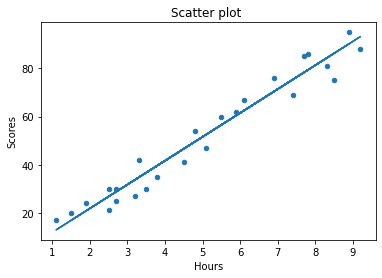

In [19]:
data.plot(kind= 'scatter', x= 'Hours', y= 'Scores', title = 'Scatter plot ')
plt.plot(x,line)

## Accuracy for training and test 

In [20]:
print("Train score : ", linearRegressor.score(x_train,y_train))
print("Test score : ", linearRegressor.score(x_test,y_test))

Train score :  0.9515510725211553
Test score :  0.9454906892105354


In [21]:
pd.DataFrame({'Actual': y_test , "pridicted": y_predict})

,Actual,pridicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [22]:
#scores at 9.25 hrs
print('scores at 9.25 hrs', linearRegressor.predict([[9.25]]))

scores at 9.25 hrs [93.69173249]


## Error of the Linear Regression Model

In [23]:
#Checking the efficiency of model
MSE = mean_squared_error(y_test, y_predict)
mean_abs_error = mean_absolute_error(y_test, y_predict)
print("Mean Squred Error:",MSE)
print("Mean absolute Error:",mean_abs_error)

Mean Squred Error: 21.598769307217456
Mean absolute Error: 4.183859899002982
